In [45]:
!pip install googletrans

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 55 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 908 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 53 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 7.5 MB/s  eta 0:00:01
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=c8a69a8aaa4dcf24d4af9e6f39c72ded80fbab88d10da2df05773350b92d4a5c
  Stored in directory: /home/stanislav/.cache/pip/wheels/06/a1/90/75375ea9aff253a4803b2356007f64aecb6ce2f1e46a0aa9ba
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=3510 sha256=c4deca757da084bc30693c2f04d44e7469e40999d9812e0c1c1864e81525ab67
  Stored in directory: /home/stanislav/.cache/pip/wheels/41/11/53/911724983aa48de

In [1]:
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
import time
from tqdm import tqdm_notebook
from googletrans import Translator
import vk


In [13]:
ua = UserAgent()

In [14]:
ua.chrome

'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'

In [15]:
headers = {
    'User-Agent': ua.chrome
}

In [16]:
res = requests.get('https://www.mirror.co.uk/sport/football/news/', headers=headers)

In [19]:
bs = BeautifulSoup(res.text, 'lxml')

In [20]:
teasers = bs.findAll("div", {"class": "teaser"})

In [42]:
data = []
for teaser in tqdm_notebook(teasers[:5]):
    a = teaser.find('figure').find('a', href=True)
    img = a.find('img')['data-src']
    if 'https://' not in img:
        continue
    link_news = a['href']
    if '/sport/football/' not in link_news:
        continue
    text_teaser = a['aria-label']

    rs = requests.get(link_news, headers=headers)
    soup = BeautifulSoup(rs.text, 'lxml')
    full_text = soup.find('p', {'class': 'sub-title'}).contents[0]
    t = dict(
        teaser=text_teaser,
        text=full_text,
        link=link_news,
        img=img,
    )
    data.append(t)
    time.sleep(10)

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

In [55]:
import os

In [56]:
os.path.splitext('http://sdfsdf.com/sdfsdf.jpg')

('http://sdfsdf.com/sdfsdf', '.jpg')

In [43]:
data

[{'img': 'https://i2-prod.mirror.co.uk/incoming/article22271684.ece/ALTERNATES/s615/0_Aston-Villa-v-Wolverhampton-Wanderers-Premier-League.jpg',
  'link': 'https://www.mirror.co.uk/sport/football/news/aston-villas-survival-bid-takes-22282538',
  'teaser': "Aston Villa's survival bid suffers big blow with Matt Targett injury news",
  'text': "Former Southampton full-back Targett was forced off in Saturday's home defeat against Wolves"},
 {'img': 'https://i2-prod.mirror.co.uk/incoming/article22247022.ece/ALTERNATES/s615/0_FBL-ENG-PR-BRIGHTON-ARSENAL.jpg',
  'link': 'https://www.mirror.co.uk/sport/football/news/arsenal-to-announce-new-long-22282494',
  'teaser': "Arsenal 'to announce new long-term Bukayo Saka contract this week'",
  'text': "Arsenal boss Mikel Arteta has been desperate to secure the future of youngster Bukayo Saka - and it seems an announcement on the player's future is imminent"},
 {'img': 'https://i2-prod.mirror.co.uk/incoming/article20058005.ece/ALTERNATES/s615/0_Arsen

In [48]:
tr = Translator(user_agent=ua.opera)

In [53]:
res = tr.translate(data[0]['text'], dest='ru', src='en')

In [54]:
res.text

'Бывший защитник Саутгемптона Targett был вынужден в субботу домашнее поражение от волков'

In [23]:
session = vk.AuthSession(app_id=7527111, user_login='staz12345@list.ru', user_password='annaisthebest29',
                        scope='wall,photos')


ProxyError: HTTPSConnectionPool(host='m.vk.com', port=443): Max retries exceeded with url: / (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required ( Forefront TMG requires authorization to fulfill the request. Access to the Web Proxy filter is denied.  )')))

In [20]:
api = vk.API(session)

In [21]:
api.photos.getWallUploadServer(group_id=196777471, v=5.21)

ProxyError: HTTPSConnectionPool(host='api.vk.com', port=443): Max retries exceeded with url: /method/photos.getWallUploadServer (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required ( Forefront TMG requires authorization to fulfill the request. Access to the Web Proxy filter is denied.  )')))

In [22]:
session.access_token

'f46772a656cd766e89bacc653971056750f50978e569a8319154072f2cbb8b454b9028b8e12a62c50e7d7'

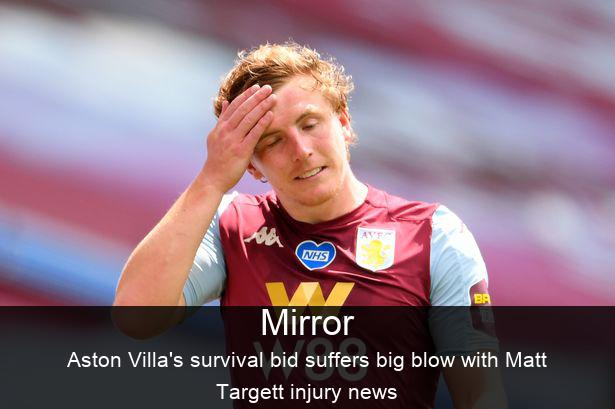

In [171]:
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from urllib.request import urlopen
import textwrap

TINT_COLOR = (0, 0, 0)  # Black
TRANSPARENCY = .8  # Degree of transparency, 0-100%
OPACITY = int(255 * TRANSPARENCY)

url = "https://i2-prod.mirror.co.uk/incoming/article22271684.ece/ALTERNATES/s615/0_Aston-Villa-v-Wolverhampton-Wanderers-Premier-League.jpg"

_, ext = os.path.splitext(url)
img_data = requests.get(url, headers = {
    'User-Agent': ua.chrome
}).content
file_name = f'sample{ext}'
with open(file_name, 'wb') as handler:
    handler.write(img_data)

img = Image.open(file_name)
img = img.convert("RGBA")

# Determine extent of the largest possible square centered on the image.
# and the image's shorter dimension.
llx, lly = 0, img.size[1] - img.size[1] * 0.25

# Calculate upper point + 1 because second point needs to be just outside the
# drawn rectangle when drawing rectangles.
urx, ury = llx+img.size[0], lly+img.size[1] * 0.25

# Make a blank image the same size as the image for the rectangle, initialized
# to a fully transparent (0% opaque) version of the tint color, then draw a
# semi-transparent version of the square on it.
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
draw.rectangle(((llx, lly), (urx, ury)), fill=TINT_COLOR+(OPACITY,))

fnt = ImageFont.truetype('/Library/Fonts/Arial.ttf', int(img.size[0] * 0.035))

fnt_mir = ImageFont.truetype('/Library/Fonts/Arial.ttf', int(img.size[0] * 0.06))

# Alpha composite these two images together to obtain the desired result.
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.



para = textwrap.wrap("Aston Villa's survival bid suffers big blow with Matt Targett injury news", 
                     width=60)

current_h, pad = img.size[1] - img.size[1] * 0.15, 8

d = ImageDraw.Draw(img)
for line in para:
    w, h = d.textsize(line, font=fnt)
    d.text(((img.size[0] - w) / 2, current_h), line, font=fnt, fill=(255, 255, 255))
    current_h += h + pad
    
#     d.text(( * 0.05, img.size[1] - img.size[1] * 0.15), 
#        , 
#        font=fnt, fill=(255, 255, 255))

source = 'Mirror'
w, h = d.textsize(source, font=fnt_mir)
d.text(((img.size[0] - w) / 2, img.size[1] * 0.74), source, font=fnt_mir, fill=(255, 255, 255))

img.save(file_name)

from IPython.display import Image
Image(filename=file_name)

In [108]:
!ls

Classes       dark-cat.jpg  index.py  __pycache__  trial.ipynb
constants.py  img	    Mappers   sample.jpg   vk_config.v2.json
